In [1]:
import pandas as pd
import sqlite3
!pip install haversine
import matplotlib.pyplot as plt
!matplotlib inline

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
/bin/sh: matplotlib: command not found


# MTA Data analysis

In [2]:
# first couple of rows of the dataset
conn = sqlite3.connect("mta_data.db")
subway = pd.read_sql("SELECT * FROM mta_data", con=conn)

In [3]:
# I am taking data from June to August (Summer)
subway.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802


In [4]:
subway['CHANGE_AMOUNT_OF_EXITS'] = subway.EXITS.diff()

In [5]:
# last five rows of the dataset
subway.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,CHANGE_AMOUNT_OF_EXITS
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,05:00:00,REGULAR,5554,577,0.0
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,09:00:00,REGULAR,5554,577,0.0
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,13:00:00,REGULAR,5554,577,0.0
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,17:00:00,REGULAR,5554,577,0.0
2722609,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,21:00:00,REGULAR,5554,577,0.0


In [6]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722610 entries, 0 to 2722609
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   C/A                     object 
 1   UNIT                    object 
 2   SCP                     object 
 3   STATION                 object 
 4   LINENAME                object 
 5   DIVISION                object 
 6   DATE                    object 
 7   TIME                    object 
 8   DESC                    object 
 9   ENTRIES                 int64  
 10  EXITS                   int64  
 11  CHANGE_AMOUNT_OF_EXITS  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 249.3+ MB


In [7]:
# creating a DATE_TIME column that contains the Date and the Time
subway['DATE_TIME'] = pd.to_datetime(subway.DATE + " " + subway.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [8]:
subway.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,CHANGE_AMOUNT_OF_EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,NaN,2021-08-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,8.0,2021-08-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,21.0,2021-08-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,48.0,2021-08-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,36.0,2021-08-21 16:00:00


In [9]:
# daily exits for each c/a, unit, scp, station and date
turnstiles_daily_exits = (subway
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())

In [10]:
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,05/29/2021,2590325
1,A002,R051,02-00-00,59 ST,05/30/2021,2590451
2,A002,R051,02-00-00,59 ST,05/31/2021,2590560
3,A002,R051,02-00-00,59 ST,06/01/2021,2590651
4,A002,R051,02-00-00,59 ST,06/02/2021,2590926


Text(0, 0.5, 'Number of exits recorded in millions')

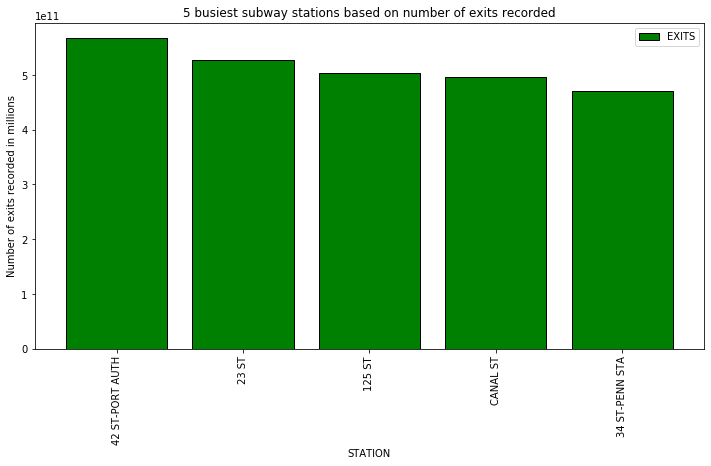

In [11]:
# Traffic is defined by the total number of exits recorded
# The station with the most total exits recorded are considered the stations with the highest traffic.
turnstiles_daily_exits.groupby("STATION").sum().sort_values("EXITS", ascending=False).head(5).plot(kind='bar', color="green", figsize=(12,6), title='5 busiest subway stations based on number of exits recorded', width=0.8,
                                                                                                  edgecolor='black')
plt.ylabel("Number of exits recorded in millions")


In [12]:
# Creating a data frame that has the 5 busiest subway stations and their coordinates (latitude, longitude)

latitude = [40.756903, 40.743069, 40.810992387899745, 40.719555, 40.752508421754506]
longitude = [-73.990437, -73.993064, -73.95264644618936, -74.001789, -73.99338227317493]
station = ['42 ST-PORT AUTH', '23 ST', '125 ST', 'CANAL ST', '34 ST-PENN STA' ]

top_busiest_sub_stations = pd.DataFrame({"STATION": station, "LATITUDE": latitude, "LONGITUDE": longitude})
top_busiest_sub_stations.head()

,STATION,LATITUDE,LONGITUDE
0,42 ST-PORT AUTH,40.756903,-73.990437
1,23 ST,40.743069,-73.993064
2,125 ST,40.810992,-73.952646
3,CANAL ST,40.719555,-74.001789
4,34 ST-PENN STA,40.752508,-73.993382


## Finding what are the busiest hours for each subway station

### 42 ST-PORT AUTH - at 19:00, 20:00 was the highest number of exits recorded 

Text(0, 0.5, 'Mean of exits recorded at each hour')

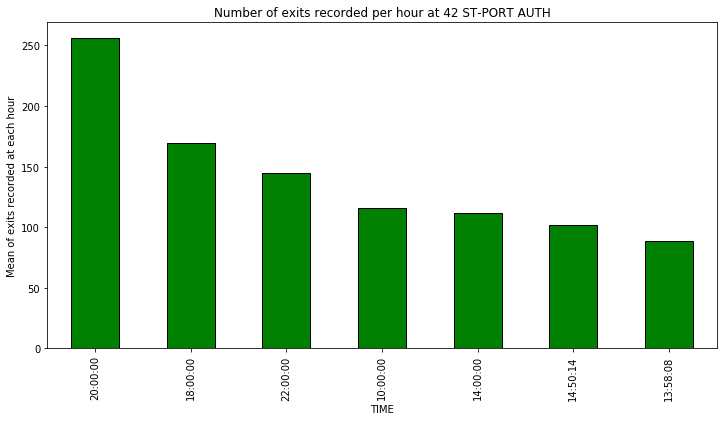

In [13]:
# Let's look for the time in which each of these stations is the busiest
# NOTE: Not all the hours have been recorded the same number of times

ST_PORT_42 = subway[subway['STATION'] == '42 ST-PORT AUTH']
ST_PORT_42[1:].groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='green', figsize=(12,6), title='Number of exits recorded per hour at 42 ST-PORT AUTH', edgecolor='black')
plt.ylabel("Mean of exits recorded at each hour")

### 23 ST

In [14]:
ST_23 = subway[subway['STATION'] == '23 ST']

In [15]:
# 08:00:00, 09:00:00, 12:00:00, 13:00:00, 16:00:00, 17:00:00, 20:00:00, 21:00:00
ST_23 = ST_23[(ST_23['TIME'] == '08:00:00') | (ST_23['TIME'] == '09:00:00') |
        (ST_23['TIME'] == '12:00:00') | (ST_23['TIME'] == '13:00:00') | (ST_23['TIME'] == '16:00:00') |
                (ST_23['TIME'] == '17:00:00') | (ST_23['TIME'] == '20:00:00') | (ST_23['TIME'] == '21:00:00')]

Text(0, 0.5, 'Mean of exits recorded at each hour')

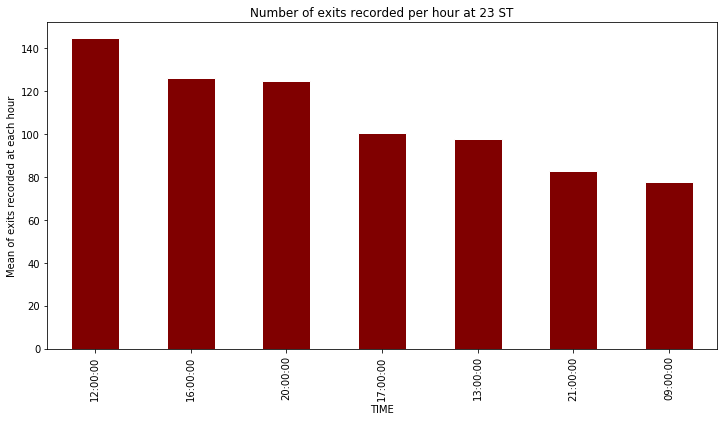

In [16]:
ST_23.groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='maroon', figsize=(12,6), title='Number of exits recorded per hour at 23 ST', edgecolor='white')
plt.ylabel("Mean of exits recorded at each hour")

## 125 ST

In [17]:
ST_125 = subway[subway['STATION'] == '125 ST']

In [18]:
# 08:00:00, 09:00:00, 12:00:00, 13:00:00, 16:00:00, 17:00:00,  20:00:00, 21:00:00 
ST_125 = ST_125[(ST_125['TIME'] == '08:00:00') | (ST_125['TIME'] == '09:00:00') |
        (ST_125['TIME'] == '12:00:00') | (ST_125['TIME'] == '13:00:00') | (ST_125['TIME'] == '16:00:00') |
                (ST_125['TIME'] == '17:00:00') | (ST_125['TIME'] == '20:00:00') | (ST_125['TIME'] == '21:00:00')]

Text(0, 0.5, 'Mean of exits recorded at each hour')

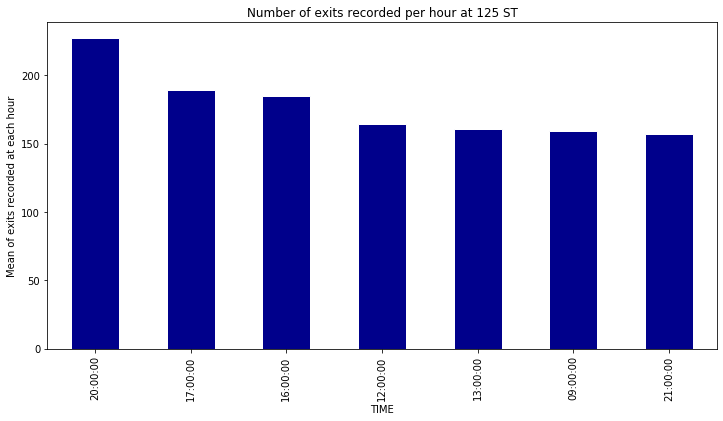

In [19]:
ST_125.groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='darkblue', figsize=(12,6), title='Number of exits recorded per hour at 125 ST', edgecolor='white')
plt.ylabel("Mean of exits recorded at each hour")

## Canal ST

In [20]:
ST_CANAL = subway[subway['STATION'] == 'CANAL ST']

In [21]:
# 01:00:00, 05:00:00, 09:00:00, 13:00:00, 17:00:00, 21:00:00
ST_CANAL = ST_CANAL[(ST_CANAL['TIME'] == '05:00:00') | (ST_CANAL['TIME'] == '09:00:00') |
        (ST_CANAL['TIME'] == '13:00:00') | (ST_CANAL['TIME'] == '17:00:00') | (ST_CANAL['TIME'] == '21:00:00')]

Text(0, 0.5, 'Mean of exits recorded at each hour')

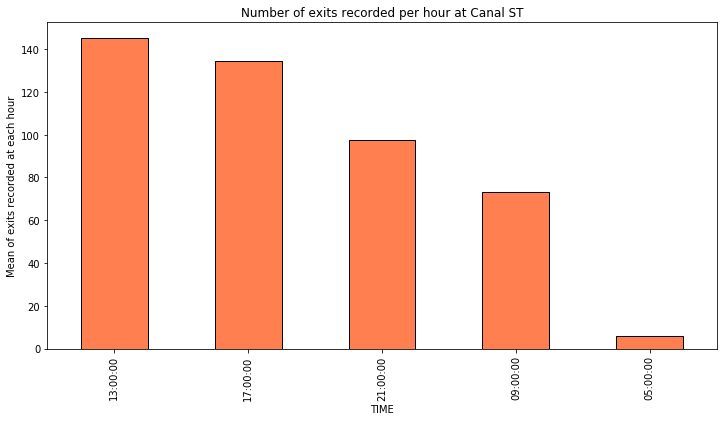

In [22]:
ST_CANAL.groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='coral', figsize=(12,6), title='Number of exits recorded per hour at Canal ST', edgecolor='black')
plt.ylabel("Mean of exits recorded at each hour")

## 34 ST-PENN STA

In [23]:
PENN = subway[subway['STATION'] == '34 ST-PENN STA']

In [24]:
# 08:00:00, 10:00:00,  12:00:00, 14:00:00, 16:00:00, 18:00:00 20:00:00, 22:00:00
PENN = PENN[(PENN['TIME'] == '08:00:00') | (PENN['TIME'] == '10:00:00') |
        (PENN['TIME'] == '12:00:00') | (PENN['TIME'] == '14:00:00') | (PENN['TIME'] == '16:00:00') | (PENN['TIME'] == '18:00:00') |
            (PENN['TIME'] == '20:00:00') | (PENN['TIME'] == '22:00:00')]

Text(0, 0.5, 'Mean of exits recorded at each hour')

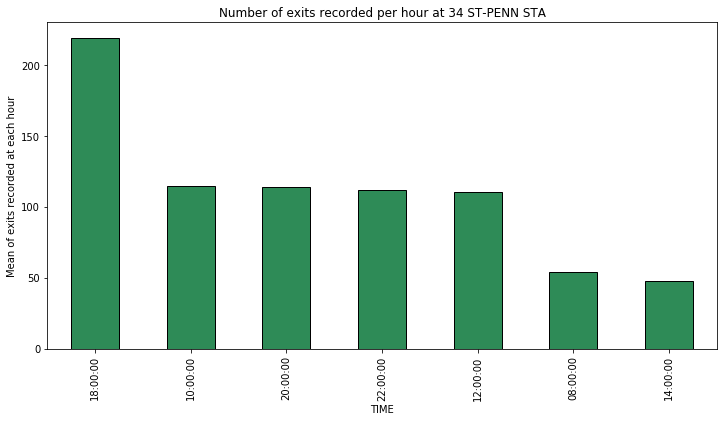

In [25]:
PENN.groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='seagreen', figsize=(12,6), title='Number of exits recorded per hour at 34 ST-PENN STA', edgecolor='black')
plt.ylabel("Mean of exits recorded at each hour")

In [26]:
## Subplots with all the charts

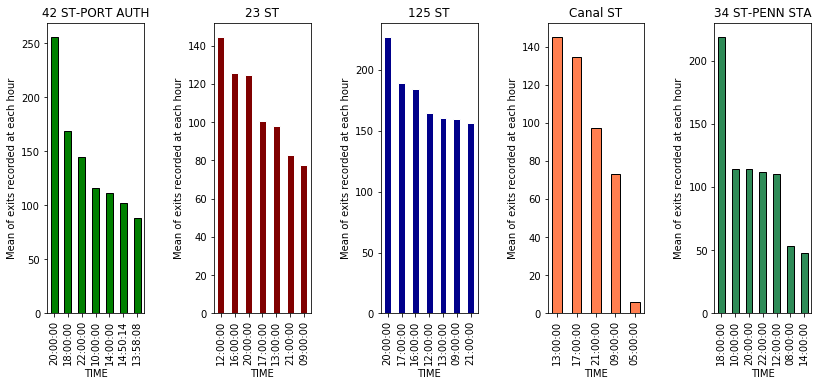

In [27]:
plt.figure(figsize=(18,36))

plt.subplot(1,5,1)
ST_PORT_42[1:].groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='green', figsize=(12,6), title='42 ST-PORT AUTH', edgecolor='black')
plt.ylabel("Mean of exits recorded at each hour")


plt.subplot(1,5,2)
ST_23.groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='maroon', figsize=(12,6), title='23 ST', edgecolor='white')
plt.ylabel("Mean of exits recorded at each hour")



plt.subplot(1,5,3)
ST_125.groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='darkblue', figsize=(12,6), title='125 ST', edgecolor='white')
plt.ylabel("Mean of exits recorded at each hour")


plt.subplot(1,5,4)
ST_CANAL.groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='coral', figsize=(12,6), title='Canal ST', edgecolor='black')
plt.ylabel("Mean of exits recorded at each hour")


plt.subplot(1,5,5)
PENN.groupby("TIME")['CHANGE_AMOUNT_OF_EXITS'].mean().sort_values(ascending=False).head(7).plot(kind='bar', color='seagreen', figsize=(12,6), title='34 ST-PENN STA', edgecolor='black')
plt.ylabel("Mean of exits recorded at each hour")

plt.tight_layout(pad=3.0)

# Citi Bike analysis

In [28]:
# Citi Bike data from June, July and August
data_06 = pd.read_csv('202106-citibike-tripdata.csv')
data_07 = pd.read_csv('202107-citibike-tripdata.csv')
data_08 = pd.read_csv('202108-citibike-tripdata.csv')


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
# concatenating all three datasets into one
bike_data = pd.concat([data_06, data_07, data_08])
bike_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6339C86D47EC0FAB,docked_bike,2021-06-02 17:18:45,2021-06-02 17:26:17,W 51 St & 6 Ave,6740.10,E 66 St & Madison Ave,6969.08,40.760659,-73.980420,40.768009,-73.968453,member
1,CDE3C147775B4002,docked_bike,2021-06-04 21:01:46,2021-06-04 21:32:09,W 56 St & 10 Ave,6955.01,E 9 St & Avenue C,5616.01,40.768254,-73.988639,40.725213,-73.977688,member
2,D335C3F6B412B846,docked_bike,2021-06-15 16:39:36,2021-06-15 16:55:02,E 56 St & Madison Ave,6732.01,E 16 St & 5 Ave,6022.04,40.761573,-73.972628,40.737262,-73.992390,member
3,8DA6810777C89735,docked_bike,2021-06-08 11:36:40,2021-06-08 11:39:41,E 68 St & 3 Ave,6896.16,1 Ave & E 62 St,6753.08,40.767128,-73.962246,40.761227,-73.960940,member
4,62D9B66A3A1D9FDF,docked_bike,2021-06-18 12:48:43,2021-06-18 13:04:14,E 48 St & 5 Ave,6626.01,W 20 St & 8 Ave,6224.05,40.757245,-73.978059,40.743453,-74.000040,member


In [30]:
# renaming some columns
bike_data.rename(columns = {"started_at": "starttime", "ended_at": "stoptime", 
                            "start_station_name": "start station name", "start_lat": "start station latitude", 
                           "start_lng": "start station longitude"}, inplace=True)

In [31]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9334532 entries, 0 to 3072477
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ride_id                  object 
 1   rideable_type            object 
 2   starttime                object 
 3   stoptime                 object 
 4   start station name       object 
 5   start_station_id         float64
 6   end_station_name         object 
 7   end_station_id           object 
 8   start station latitude   float64
 9   start station longitude  float64
 10  end_lat                  float64
 11  end_lng                  float64
 12  member_casual            object 
dtypes: float64(5), object(8)
memory usage: 997.0+ MB


In [32]:
# over 9 million rows of data
bike_data.shape

(9334532, 13)

In [33]:
# a list with each different bike station
the_station = list(bike_data.groupby("start station name")['start station latitude'].count().index)
len(the_station)

1501

In [34]:
# I ran this code once and saved the results to the CSV station_latitude_longitude_df.csv

'''# Getting the latitude for each bike station
#lati = []

#for i in the_station:
   # lati.append(bike_data[bike_data['start station name'] == str(i)]['start station latitude'].value_counts().index[0])
    

# Getting the longitude for each bike station
#longi = []

#for i in the_station:
    #longi.append(bike_data[bike_data['start station name'] == str(i)]['start station longitude'].value_counts().index[0])
    
    
len(the_station) == len(lati) == len(longi)


# Create a dataframe that includes the following columns: The station name, Latitude, Longitude
station_latitude_longitude_df = pd.DataFrame({"station": the_station, "latitude": lati, "longitude": longi})
station_latitude_longitude_df.shape


# I am saving it to a csv file to be able to use it easily
station_latitude_longitude_df.to_csv("station_latitude_longitude_df.csv", index=False)
station_latitude_longitude_df.head()'''

'# Getting the latitude for each bike station\n#lati = []\n\n#for i in the_station:\n   # lati.append(bike_data[bike_data[\'start station name\'] == str(i)][\'start station latitude\'].value_counts().index[0])\n    \n\n# Getting the longitude for each bike station\n#longi = []\n\n#for i in the_station:\n    #longi.append(bike_data[bike_data[\'start station name\'] == str(i)][\'start station longitude\'].value_counts().index[0])\n    \n    \nlen(the_station) == len(lati) == len(longi)\n\n\n# Create a dataframe that includes the following columns: The station name, Latitude, Longitude\nstation_latitude_longitude_df = pd.DataFrame({"station": the_station, "latitude": lati, "longitude": longi})\nstation_latitude_longitude_df.shape\n\n\n# I am saving it to a csv file to be able to use it easily\nstation_latitude_longitude_df.to_csv("station_latitude_longitude_df.csv", index=False)\nstation_latitude_longitude_df.head()'

In [35]:
station_latitude_longitude_df = pd.read_csv("station_latitude_longitude_df.csv")
station_latitude_longitude_df.head()

,station,latitude,longitude
0,1 Ave & E 110 St,40.792327,-73.938300
1,1 Ave & E 16 St,40.732219,-73.981656
2,1 Ave & E 18 St,40.733812,-73.980544
3,1 Ave & E 30 St,40.741444,-73.975361
4,1 Ave & E 39 St,40.747140,-73.971130


# What Bike Station are in proximity to the 5 subway stations

### I'm using the haversine distance to find the distance between the subway station and each bike station

In [36]:
top_busiest_sub_stations.head()

,STATION,LATITUDE,LONGITUDE
0,42 ST-PORT AUTH,40.756903,-73.990437
1,23 ST,40.743069,-73.993064
2,125 ST,40.810992,-73.952646
3,CANAL ST,40.719555,-74.001789
4,34 ST-PENN STA,40.752508,-73.993382


In [37]:
# the five busiest subway station with their latitude and longitude packed in tuples

ST_PORT_42 = (40.75690276452623, -73.99043660221584)
ST_23 = (40.74306879496494, -73.99306417338107)
ST_125 = (40.810992, -73.952646)
CANAL_ST = (40.71955456696046, -74.00178878605693)
PENN_STA = (40.752508, -73.993382)

In [38]:
# creating a list of tuples containing each bike's station coordinates
list_of_tuples = []

for i in range(897):
    print(f"({station_latitude_longitude_df['latitude'][i]}, {station_latitude_longitude_df['longitude'][i]})")
    list_of_tuples.append(f"({station_latitude_longitude_df['latitude'][i]}, {station_latitude_longitude_df['longitude'][i]})")

list_of_tuples = [eval(i) for i in list_of_tuples]

(40.7923272, -73.9383)
(40.73221853, -73.98165557)
(40.73381219196632, -73.9805442094803)
(40.74144387, -73.97536082)
(40.74714, -73.97113)
(40.75001986, -73.96905301)
(40.72633085971696, -73.98616880178452)
(40.7612274, -73.96094022)
(40.76500525, -73.95818491)
(40.77140426, -73.9535166)
(40.78172120000001, -73.94594000000002)
(40.6809591, -73.99905709)
(40.672784, -73.979826)
(40.74198159994023, -74.00831580162048)
(40.86128197075099, -73.92141759395601)
(40.862638, -73.92005999999998)
(40.864632, -73.918598)
(40.86932465640094, -73.91519755125046)
(40.75066386, -74.00176802)
(40.671907, -73.993612)
(40.6686273, -73.98700053)
(40.6662078, -73.98199886)
(40.65629000000001, -73.977335)
(40.751396, -74.00522600000002)
(40.76030096, -73.99884222)
(40.771496710544405, -73.99046033620834)
(40.7519071, -73.94791190000002)
(40.643546, -73.986418)
(40.818299, -73.96040500000002)
(40.76087502, -74.00277668)
(40.668603, -73.99043940000001)
(40.666287, -73.98895053)
(40.663779, -73.98396846)
(40

(40.75724567911726, -73.97805914282799)
(40.72299208, -73.97995466)
(40.72769, -73.990993)
(40.757334, -73.974235)
(40.75455731, -73.96592976)
(40.755293, -73.967641)
(40.75714758, -73.97207836)
(40.75828065, -73.97069431)
(40.75971079999999, -73.97402311)
(40.756265, -73.964179)
(40.75797322, -73.96603308)
(40.75934501, -73.96759673)
(40.761573, -73.972628)
(40.759125, -73.96265799999998)
(40.75892386377695, -73.96226227283478)
(40.759125, -73.96265799999998)
(40.76095756, -73.96724467)
(40.763025942805186, -73.97209525108337)
(40.76350532, -73.97109243)
(40.72453734, -73.98185424)
(40.72228087, -73.97668709)
(40.759107, -73.959223)
(40.763954, -73.9646)
(40.76471851944339, -73.96222069859505)
(40.768008893059466, -73.96845281124116)
(40.76780080148132, -73.96592080593109)
(40.76712840349542, -73.96224617958069)
(40.7691572, -73.96703464)
(40.72621788, -73.98379855)
(40.77118287540658, -73.96409422159195)
(40.76663814, -73.95348296)
(40.7689738, -73.95482273)
(40.77112927, -73.9577229

### Now that I have the subway stations coordinates as well as the bike's station coordinates, I will use haversine
### to find the bike stations that are less than 0.4 km away from the subway station

In [39]:
from haversine import haversine, Unit

In [40]:
top_busiest_sub_stations.head()

,STATION,LATITUDE,LONGITUDE
0,42 ST-PORT AUTH,40.756903,-73.990437
1,23 ST,40.743069,-73.993064
2,125 ST,40.810992,-73.952646
3,CANAL ST,40.719555,-74.001789
4,34 ST-PENN STA,40.752508,-73.993382


## Time in which the bike stations in proximity to 42 ST-PORT AUTH started the most rides
## Keeping in mind that the time in which more exits were recorded at 42 ST-PORT AUTH was between 4:00 and 8:00 pm

In [41]:
# One bike station is very close to the ST_PORT_42 subway station
for i in list_of_tuples:
    if haversine(ST_PORT_42, i) < 0.4:
        print(haversine(ST_PORT_42, i), i)

0.2785867563255566 (40.75461, -73.99176999999997)
0.3722440809479019 (40.76019252, -73.9912551)
0.37962850546765503 (40.75513557, -73.98658032)


In [42]:
# Finding the name of the three bike stations close to ST_PORT_42
# finding the station names by the given coordinates

bike_stations_near_ST_PORT_42 = [40.75461, 40.76019252, 40.75513557]

for i in bike_stations_near_ST_PORT_42:
    print(station_latitude_longitude_df[station_latitude_longitude_df['latitude'] == i].station)

262    8 Ave & W 38 St
Name: station, dtype: object
270    9 Ave & W 45 St
Name: station, dtype: object
404    Broadway & W 41 St
Name: station, dtype: object


In [43]:
# creating a column that contains the hour in which a person starts a ride, only the hour
bike_data.starttime = pd.to_datetime(bike_data.starttime)
bike_data['exact_start_time'] = bike_data.starttime.dt.hour

In [53]:
# 8 Ave & W 38 St - 35% of rides where started at the time in which the 42 ST-PORT AUTH subway reported more exits
ave_8 = bike_data[bike_data['start station name'] == '8 Ave & W 38 St']
ave_8.exact_start_time.value_counts().head()

percentage_of_rides_started_rush_hour = ave_8[(ave_8.exact_start_time == 16) | (ave_8.exact_start_time == 17) | (ave_8.exact_start_time == 18) |
                                        (ave_8.exact_start_time == 19) | (ave_8.exact_start_time == 20)].exact_start_time.value_counts().sum() / ave_8.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.3556053811659193

In [54]:
# 9 Ave & W 45 St - 38% of rides where started at the time in which the 42 ST-PORT AUTH subway reported more exits
ave_9 = bike_data[bike_data['start station name'] == '9 Ave & W 45 St']
percentage_of_rides_started_rush_hour = ave_9[(ave_9.exact_start_time == 16) | (ave_9.exact_start_time == 17) | (ave_9.exact_start_time == 18) |
                                        (ave_9.exact_start_time == 19) | (ave_9.exact_start_time == 20)].exact_start_time.value_counts().sum() / ave_9.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.3879034872412356

In [55]:
# Broadway & W 41 St - 32% of rides where started at the time in which the 42 ST-PORT AUTH subway reported more exits
broad = bike_data[bike_data['start station name'] == 'Broadway & W 41 St']


percentage_of_rides_started_rush_hour = broad[(broad.exact_start_time == 16) | (broad.exact_start_time == 17) | (broad.exact_start_time == 18) |
                                        (broad.exact_start_time == 19) | (broad.exact_start_time == 20)].exact_start_time.value_counts().sum() / broad.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.32113706726709823

## Time in which the bike stations in proximity to 23 ST started the most rides
## Keeping in mind that the time in which more exits were recorded at 23 ST was between 8:00am and 12:00 pm

In [42]:
# one bike station is very close to the ST_23 subway station
for i in list_of_tuples:
    if haversine(ST_23, i) < 0.4:
        print(haversine(ST_23, i), i)

0.32745421458070834 (40.74286877312112, -73.98918628692627)


In [43]:
# Finding the name of the bike station close to ST_23
# finding the station names by the given coordinates

bike_stations_near_ST_23 = [40.74286877312112]

for i in bike_stations_near_ST_23:
    print(station_latitude_longitude_df[station_latitude_longitude_df['latitude'] == i].station)

399    Broadway & W 25 St
Name: station, dtype: object


In [61]:
# Broadway & W 25 St - 23% of rides where started at the time in which the 23 ST subway reported more exits
broad2 = bike_data[bike_data['start station name'] == 'Broadway & W 25 St']
broad2.exact_start_time.value_counts().head()

percentage_of_rides_started_rush_hour = broad2[(broad2.exact_start_time == 8) | (broad2.exact_start_time == 9) | (broad2.exact_start_time == 10) |
                                        (broad2.exact_start_time == 11) | (broad2.exact_start_time == 12)].exact_start_time.value_counts().sum() / broad2.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.23496480239454576

## Time in which the bike stations in proximity to 125 ST started the most rides
## Keeping in mind that the time in which more exits were recorded at 125 ST was between 4:00am and 8:00 pm

In [45]:
# one bike station is very close to the ST_125 subway station
for i in list_of_tuples:
    if haversine(ST_125, i) < 0.4:
        print(haversine(ST_125, i), i)

0.33581567305654353 (40.8125511, -73.9492286)


In [46]:
# Finding the name of the bike station close to ST_125
# finding the station names by the given coordinates

bike_stations_near_ST_125 = [40.8125511]

for i in bike_stations_near_ST_125:
    print(station_latitude_longitude_df[station_latitude_longitude_df['latitude'] == i].station)

789    Frederick Douglass Blvd & W 129 St
Name: station, dtype: object


In [60]:
# Frederick Douglass Blvd & W 129 St - 33% of rides where started at the time in which the 125 ST subway reported more exits
frederick = bike_data[bike_data['start station name'] == 'Frederick Douglass Blvd & W 129 St']
frederick.exact_start_time.value_counts().head()


percentage_of_rides_started_rush_hour = frederick[(frederick.exact_start_time == 16) | (frederick.exact_start_time == 17) | (frederick.exact_start_time == 18) |
                                        (frederick.exact_start_time == 19) | (frederick.exact_start_time == 20)].exact_start_time.value_counts().sum() / frederick.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.3375779625779626

## Time in which the bike stations in proximity to Canal ST started the most rides
## Keeping in mind that the time in which more exits were recorded at Canal ST was between 9:00 am and 1:00 pm

In [62]:
# Two bike stations that are very close to the CANAL_ST subway station
for i in list_of_tuples:
    if haversine(CANAL_ST, i) < 0.4:
        print(haversine(CANAL_ST, i), i)

0.24373914947108025 (40.72170005235607, -74.00238141417502)
0.1802804485733543 (40.71910537, -73.99973337)


In [63]:
# Finding the name of the two bike stations close to CANAL_ST
# finding the station names by the given coordinates

bike_stations_near_canal = [40.72170005235607, 40.71910537]

for i in bike_stations_near_canal:
    print(station_latitude_longitude_df[station_latitude_longitude_df['latitude'] == i].station)

852    Grand St & Greene St
Name: station, dtype: object
895    Howard St & Centre St
Name: station, dtype: object


In [64]:
# Grand St & Greene St - 16% of rides where started at the time in which the Canal ST subway reported more exits
grand_st = bike_data[bike_data['start station name'] == 'Grand St & Greene St']

percentage_of_rides_started_rush_hour = grand_st[(grand_st.exact_start_time == 9) | (grand_st.exact_start_time == 10) | (grand_st.exact_start_time == 11) |
                                        (grand_st.exact_start_time == 12) | (grand_st.exact_start_time == 1)].exact_start_time.value_counts().sum() / grand_st.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.16727953930479428

In [66]:
# Howard St & Centre St - 17% of rides where started at the time in which the Canal ST subway reported more exits
howard = bike_data[bike_data['start station name'] == 'Howard St & Centre St']

percentage_of_rides_started_rush_hour = howard[(howard.exact_start_time == 9) | (howard.exact_start_time == 10) | (howard.exact_start_time == 11) |
                                        (howard.exact_start_time == 12) | (howard.exact_start_time == 1)].exact_start_time.value_counts().sum() / howard.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.17982897384305835

## Time in which the bike stations in proximity to 34 ST-PENN ST started the most rides
## Keeping in mind that the time in which more exits were recorded at 34 ST-PENN ST  was between 2:00 pm and 6:00 pm

In [67]:
# Three bike stations that are very close to the PENN_STA subway station
for i in list_of_tuples:
    if haversine(PENN_STA, i) < 0.4:
        print(haversine(PENN_STA, i), i)

0.24031141773092873 (40.7505853470215, -73.9946848154068)
0.11612884256533429 (40.751551, -73.993934)
0.2703106656952306 (40.75461, -73.99176999999997)


In [68]:
# Finding the name of the three bike stations close to PENN_STA
# finding the station names by the given coordinates

bike_stations_near_penn = [40.7505853470215, 40.751551, 40.75461]

for i in bike_stations_near_penn:
    print(station_latitude_longitude_df[station_latitude_longitude_df['latitude'] == i].station)

260    8 Ave & W 31 St
Name: station, dtype: object
261    8 Ave & W 33 St
Name: station, dtype: object
262    8 Ave & W 38 St
Name: station, dtype: object


In [69]:
# 8 Ave & W 31 St - 32% of rides where started at the time in which the 34 ST-PENN ST subway reported more exits
ave_8_penn = bike_data[bike_data['start station name'] == '8 Ave & W 31 St']


percentage_of_rides_started_rush_hour = ave_8_penn[(ave_8_penn.exact_start_time == 14) | (ave_8_penn.exact_start_time == 15) | (ave_8_penn.exact_start_time == 16) |
                                        (ave_8_penn.exact_start_time == 17) | (ave_8_penn.exact_start_time == 18)].exact_start_time.value_counts().sum() / ave_8_penn.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.3235318721766773

In [70]:
# 8 Ave & W 33 St - 37% of rides where started at the time in which the 34 ST-PENN ST subway reported more exits
ave_8_penn_33 = bike_data[bike_data['start station name'] == '8 Ave & W 33 St']

percentage_of_rides_started_rush_hour = ave_8_penn_33[(ave_8_penn_33.exact_start_time == 14) | (ave_8_penn_33.exact_start_time == 15) | (ave_8_penn_33.exact_start_time == 16) |
                                        (ave_8_penn_33.exact_start_time == 17) | (ave_8_penn_33.exact_start_time == 18)].exact_start_time.value_counts().sum() / ave_8_penn_33.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.3721641702093846

In [73]:
# 8 Ave & W 38 St - 36% of rides where started at the time in which the 34 ST-PENN ST subway reported more exits
ave_8_penn_38 = bike_data[bike_data['start station name'] == '8 Ave & W 38 St']

percentage_of_rides_started_rush_hour = ave_8_penn_38[(ave_8_penn_38.exact_start_time == 14) | (ave_8_penn_38.exact_start_time == 15) | (ave_8_penn_38.exact_start_time == 16) |
                                        (ave_8_penn_38.exact_start_time == 17) | (ave_8_penn_38.exact_start_time == 18)].exact_start_time.value_counts().sum() / ave_8_penn_38.exact_start_time.value_counts().sum()

percentage_of_rides_started_rush_hour

0.3669384427231961